In [3]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
# import timeit
from scipy.integrate import odeint
from scipy import stats
from sklearn.manifold import MDS
from matplotlib.ticker import FormatStrFormatter
import modelSystems as ms
from EDMtoolkit import *
from modelSystems import *

# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def MDStimescaleDecomp(Xr, lags=3, window_size=0.2):
    X, _ = delayEmbed(Xr, 1, lags, 1)
    
    n = X.shape[0]
    
    distance_matrix = distanceMatrix(X)

    similarity_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            similarity_matrix[i,j] = dynamicSimilarity(distance_matrix, i, j, window_size=window_size)
    print(f"{i},{j}:{similarity_matrix[i,j]}")
    
    similarity_matrix = standardize(similarity_matrix)
    
    fig, ax = plt.subplots(1)
    ax.imshow(similarity_matrix)
    plt.show()
    
    embedding = MDS(dissimilarity="precomputed")
    X_transformed = embedding.fit_transform(similarity_matrix)
    
    return X_transformed
    
"""
def dynamicSimilarity(distance_matrix, t1, t2, window_size=0.2):
    n = distance_matrix.shape[0]
    n_neighbors = 3
    
    win_radius = int(n * window_size)
    
    U = max(0, t1-win_radius)
    D = min(n, t1+win_radius)
    L = max(0, t2-win_radius)
    R = min(n, t2+win_radius)
    
    window = distance_matrix[U:D, L:R]

    distance = np.mean(np.exp(-window))
    
    return distance

    dynamic_similarity = 0
    for x1 in window1:
        neighbors = nearestNeighbors(x1, window2, n_neighbors)
        for neighbor in neighbors:
            dynamic_similarity += la.norm(neighbor-x1)**2
    
    return dynamic_similarity / (n*n_neighbors)
    
"""
def distanceMatrix(X):
    n = X.shape[0]
    
    distance_matrix = np.zeros((n,n),dtype=float)
    for i in range(n):
        for j in range(n):
            distance_matrix[i,j] = la.norm(X[i]-X[j])
            
    return distance_matrix

def driverVdelta(resolution):
    # Final data will be
    # Nonstat Rate(0,1)|thetaNS|deltaNS|errNS(l1o)|errNS(seq)|lagNS|dofNS|thetaS|errS(l1o)|errS(seq)|lagS|dofS
    
    table = np.zeros((resolution, 12))
    
    x0 = np.array([0.1,0.4,9])
    for r in range(resolution):
        rate = float(r)/resolution
        b1 = lambda t: 2.5 + rate * 4 * t / end
        
        Xr = standardize(generateTimeSeriesContinuous('HastingsPowellP', x0, nsargs=(b1,), end=end, tlen = tlen, reduction = reduction, settlingTime=settlingTime))[:,0,None]

        predictionHorizon = 1
        lagStep = 1
        maxLags = 6
        
        plotTS(Xr)
        
        thetaNS, deltaNS, errNS, lagsNS, thetaS, errS, lagsS = optimizationSuite(Xr, tr, predictionHorizon, maxLags, lagStep, minLags = )
        
        Xn, Yn, txn = delayEmbed(Xr, predictionHorizon, lagsNS, lagStep, t=t)
        dofNS = dofestimation(Xn, Yn, txn, thetaNS, deltaNS)

        Xs, Ys, txs = delayEmbed(Xr, predictionHorizon, lagsS, lagStep, t=t)
        dofS = dofestimation(Xs, Ys, txs, thetaNS, 0)
        
        MSENS, sequentialNS = sequential(Xn, Yn, txn, thetaNS, deltaNS, returnSeries=True)
        MSES, sequentialS = sequential(Xs, Ys, txs, thetaS, 0, returnSeries=True)
        
        stinky = np.array([rate,thetaNS,deltaNS,errNS,MSENS,lagsNS,dofNS,thetaS,errS,MSES,lagsS,dofS])
        for pp in range(12):
            table[r,pp] = stinky[pp]
            
        AkaikeTest(errNS, errS, dofNS, dofS, Xr.shape[0])
        
    return table

SyntaxError: invalid syntax (<ipython-input-4-ca74400bc494>, line 81)

In [ ]:
# Xr = ms.generateTimeSeriesContinuous('Lorenz', np.array([1,5,17]))
# c = lambda t: 2+2*t/256+np.sin(t)
# Xr = generateTimeSeriesContinuous('RosslerP', np.array([1,1,1]), nsargs=(c,), end=256, tlen = 1024, reduction = 4)

In [ ]:
nyears = 1

settlingTime = 2 ** 10
tlen = 2 ** 9
end = 2**11 # (3.498901098901099 / (12*reduction)) * tlen # 2**3
reduction = 2 ** 0
trainToTest = 0.80 # between 0 and 1

tr = np.linspace(0, end, num=tlen)
t = tr

# MAKE SURE TO UPDATE THE DIMENSION WHEN SWITCHING ATTRACTORS
dim = 1
ndrivers = 1

# t0 = np.array([0.34])
# t0 = np.ones(3) * 3# np.array([0,5,15])# np.ones(dim) * 0.3333 # np.array([0,5,15]) * 1 # np.zeros(dim)
# 
# t0 = np.ones(5)
# t0[0] += 0.1
# t0 = np.array([0,5,15])

In [ ]:
# datums = driverVdelta(10)

In [ ]:
# weightDropoff = np.exp(-datums[:,2]*0.1)
# weightDropoff = (1-datums[:,2])**(1/10)
#pcc = np.corrcoef(datums[:,0],weightDropoff)[0,1]

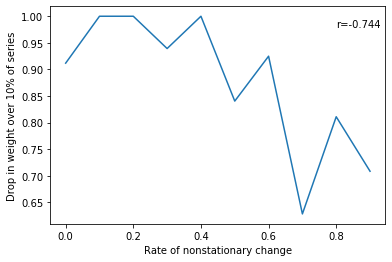

In [111]:

# plotTS((1-datums[:,2])**0.1)
fig, ax = plt.subplots(1)
#ax.plot(datums[:,0], (1-datums[:,2])**0.1)

ax.plot(datums[:,0], weightDropoff)
ax.set_ylabel("Drop in weight over 10% of series")
ax.set_xlabel("Rate of nonstationary change")
ax.text(0.8,0.98,f"r={pcc:.3f}")
plt.show()



In [74]:
# np.save("driverVdelta_4", datums)

In [75]:
# datums2 = np.load("driverVdelta_2.npy")

In [114]:
""" INITIAL CONDITIONS """
# x0 = np.array([3,250])
# x0 = np.array([0.49])
x0 = np.array([0.1,0.4,9])

# m = 50
# x0 = np.ones(m) * (np.pi ** -1)
# x0[0] += 0.2
# x0[1] += 0.3
# x0 = np.array([1,5,9],dtype=float)

""" DRIVERS """
# Gmax = lambda t: 0.7 # +0.5*t/tlen
# r = lambda t: 3 - 0.5 * t / tlen
# m = lambda t: 0.3
# b1 = lambda t: 4 + 2 * np.sin(2*np.pi*t / end)
b1 = lambda t: 2.5#3 + 3.5 * t / end

""" GENERATE TS """
# Xr = generateTimeSeriesContinuous("HastingsPowell", x0, tlen=tlen, end=end, reduction=reduction, settlingTime=settlingTime)
Xr = standardize(generateTimeSeriesContinuous('HastingsPowellP', x0, nsargs=(b1,), end=end, tlen = tlen, reduction = reduction, settlingTime=settlingTime))[:,0,None]
# Xc = generateTimeSeriesDiscrete(DensityDependentMaturation, x0, settlingTime=30, tlen=tlen)
# Xc = generateTimeSeriesDiscrete(DensityDependentMaturationP, x0, settlingTime=30, tlen=tlen, nsargs=(Gmax,))
# Xr = Xc[:,1,None]
# Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=tlen, nsargs=(r,), settlingTime=settlingTime)
# Xr = generateTimeSeriesDiscrete("LogisticIslandsP", x0, nsargs=(r, m), tlen=tlen, settlingTime=settlingTime)[:,4,None]

In [115]:
"""
fig, ax = plt.subplots(1, figsize=(6,4))
ax.scatter(Xc[:,1], Xc[:,0])
ax.set_xlabel("Juveniles")
ax.set_ylabel("Adults")

# ax[1].plot(Xr[::5,1])
# ax[1].set_ylabel("Juveniles")
# ax[2].plot(Xr[::5,0])
# ax[2].set_ylabel("Adults")
plt.tight_layout()
plt.show()
"""

'\nfig, ax = plt.subplots(1, figsize=(6,4))\nax.scatter(Xc[:,1], Xc[:,0])\nax.set_xlabel("Juveniles")\nax.set_ylabel("Adults")\n\n# ax[1].plot(Xr[::5,1])\n# ax[1].set_ylabel("Juveniles")\n# ax[2].plot(Xr[::5,0])\n# ax[2].set_ylabel("Adults")\nplt.tight_layout()\nplt.show()\n'

In [116]:
# poincareT(Xc[:,1],xlabel="Juveniles(t)", ylabel="Juveniles(t-1)")

In [117]:
# FROM DATA

"""
file = "GPDD.csv"
data = pd.read_csv(file,encoding="utf-8",na_filter=False)
states = data.to_numpy()

Xr = np.log(states[:,2,None]+1)
tr = states[:,3] - np.min(states[:,3])
tlen = states.shape[0]
"""
# END FROM DATA

'\nfile = "GPDD.csv"\ndata = pd.read_csv(file,encoding="utf-8",na_filter=False)\nstates = data.to_numpy()\n\nXr = np.log(states[:,2,None]+1)\ntr = states[:,3] - np.min(states[:,3])\ntlen = states.shape[0]\n'

In [118]:

""" UPDATE DRIVERS HERE """

digiDrivers = [b1]

"""
gtsr = np.zeros((Xr.shape[0], ndrivers))
for ind in range(len(digiDrivers)):
    tmp = np.fromfunction(lambda i : digiDrivers[ind](i), (Xr.shape[0],) , dtype = float)# time series of gmax
    gtsr[:,ind] = tmp
"""
# gtsr = h2(t)
gtsr = b1(t) # driverArray
# gtsr = c(t)

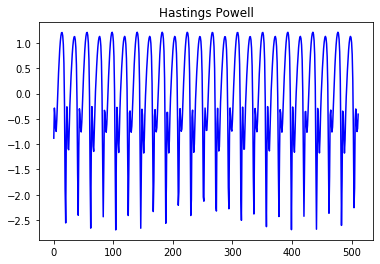

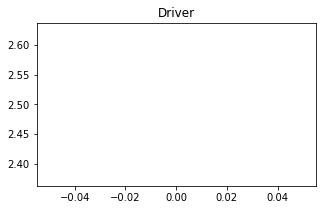

In [119]:
fig2 = plt.figure(2)

if dim == 1:
    ax2 = plt.subplot()
    ax2.plot(Xr[:,0],"b") # states
elif dim == 2:
    ax2 = plt.subplot()
    ax2.plot(Xr[:,0],Xr[:,1])
else:
    ax2 = fig2.gca(projection="3d")
    ax2.plot(Xr[:,0],Xr[:,1],Xr[:,2], linewidth=1)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])
    ax2.set_xlabel("x(t)")
    ax2.set_ylabel("y(t)")
    ax2.set_zlabel("z(t)")
    
ax2.set_title("Hastings Powell")
    
""" 
ax2 = fig2.gca(projection="3d")
ax2.plot(t[settlingTime:],Xr[:,0],Xr[:,1])
ax2.set_xlabel("Time")
ax2.set_ylabel("Species 1 (standardized)")
ax2.set_zlabel("Species 2 (standardized)")
"""
# ax2.set_title("Rosenzweig MacArthur")
plt.savefig("Raw Data")

if dim != 1:
    figTS, axTS = plt.subplots(dim,figsize=(5,dim*3))
    axTS[0].set_title("Cross section Time Series")
    for i in range(dim):
        axTS[i].set_title("Index: {ind}".format(ind=i))
        axTS[i].plot(Xr[:,i])

plt.savefig("Individual Dimensions")
        
if ndrivers != 0:
    figD, axD = plt.subplots(ndrivers, figsize=(5,ndrivers*3))
    if ndrivers == 1:
        axD.set_title("Driver")
        axD.plot(gtsr, c="tab:orange")
    else:
        axD[0].set_title("Driver(s)")
        for d in range(ndrivers):
            axD[d].plot(gtsr[:,d], c="tab:orange")
            
    plt.savefig("Drivers")
        
plt.show()

In [120]:
"""
n = 100
similarity_matrix = np.fromfunction(lambda i,j: np.exp(-((i-j)/n)**2), (n,n))
similarity_matrix = (similarity_matrix - np.mean(similarity_matrix) ) / np.var(similarity_matrix) * 8
"""

'\nn = 100\nsimilarity_matrix = np.fromfunction(lambda i,j: np.exp(-((i-j)/n)**2), (n,n))\nsimilarity_matrix = (similarity_matrix - np.mean(similarity_matrix) ) / np.var(similarity_matrix) * 8\n'

In [221]:
embedding = MDS(dissimilarity="precomputed", n_components=10)
X_transformed = embedding.fit_transform(similarity_matrix)

c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype

<IPython.core.display.Javascript object>


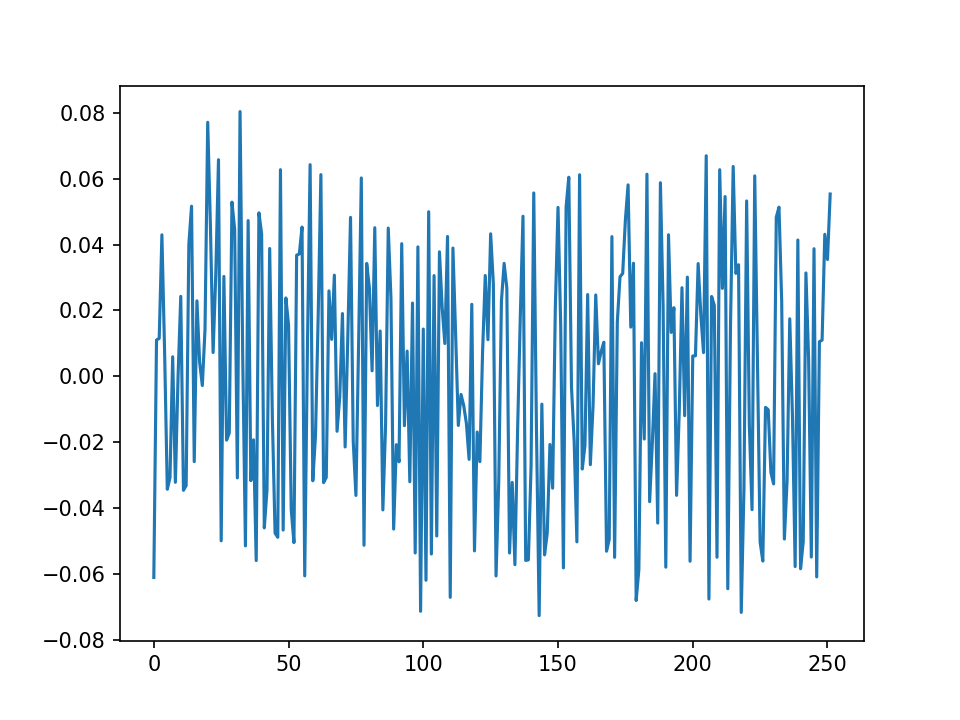

In [227]:
fig, ax = plt.subplots(1)
ax.plot(X_transformed[:,0])
plt.show()

In [62]:
# transformed = MDStimescaleDecomp(Xr)

0,251:639.210889219977
1,251:652.1435382948912
2,251:661.7399754436877
3,251:672.0413350046916
4,251:684.1945445043644
5,251:701.574972872126
6,251:711.8584619063646
7,251:723.7383553552442
8,251:731.6705683033872
9,251:740.1749921528325
10,251:750.0580710390454
11,251:760.271750196645
12,251:762.7832063090381
13,251:765.6345108906488
14,251:778.169912700936
15,251:791.4698285743274
16,251:797.1429500975668
17,251:803.0110122163203
18,251:810.449282561496
19,251:820.6565056877239
20,251:833.296391616657
21,251:850.6722323484457
22,251:861.0604328872314
23,251:874.186179391334
24,251:891.5841575432157
25,251:901.8999445468974
26,251:907.6900272845448
27,251:921.1356171992506
28,251:935.3304333759747
29,251:946.240433651473
30,251:957.7833916257503
31,251:970.1858027555845
32,251:994.2260793055258
33,251:1005.2431915934451
34,251:1024.1078495273377
35,251:1035.4104271665992
36,251:1048.0737134342296
37,251:1061.8189341598666
38,251:1086.60496475029
39,251:1110.9028607728303
40,251:1134.7

<IPython.core.display.Javascript object>

ValueError: Array must be symmetric

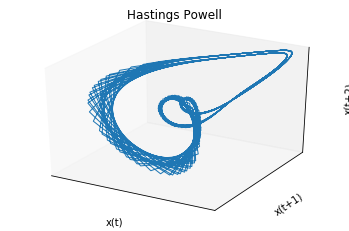

In [121]:
poincare3d(Xr[:,0,None], title="Hastings Powell", scatter=False, step=1)

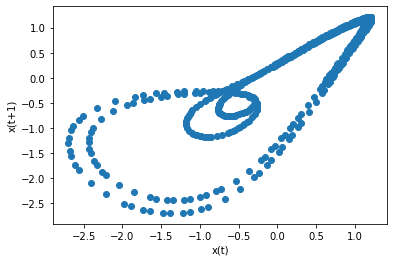

In [122]:
poincare2d(Xr, step = 1)

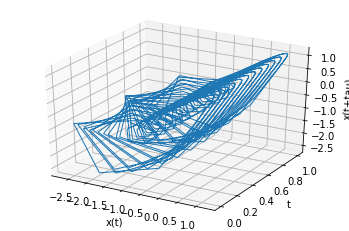

In [123]:
poincareT(Xr,step=1, scatter=False)

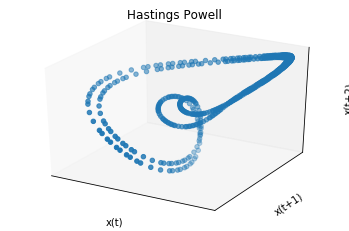

In [124]:
poincare3d(Xr, title="Hastings Powell")

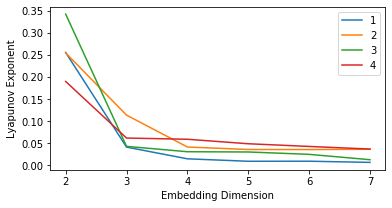

In [125]:
FNNplot(Xr, 5, 4)

In [83]:
predictionHorizon = 1
numLags = 1
lagStep = 1
maxLags = 4

In [84]:
thetaNS, deltaNS, errNS, lagsNS, thetaS, errS, lagsS = optimizationSuite(Xr, tr, predictionHorizon, maxLags, lagStep)

[1.1 0. ]
237.13620635510244
[2.31 0.25]
155.239497187082
[1.705 0.125]
149.3941860896278
[2.0075 0.    ]
149.64907173794637
[2.34025 0.06875]
149.81653101864813
[2.173875 0.034375]
149.10489116955324
[1.9908625 0.       ]
148.89802855664104
[2.08236875 0.01890625]
149.85062241514638
[2.18302563 0.00945313]
148.85324380815874
[2.13269719 0.        ]
148.8598621295431
[2.15786141 0.00519922]
149.60123755024352
[2.1452793  0.00259961]
148.84123866778674
[2.13143898 0.        ]
148.83247730107718
[2.13835914e+00 1.42978516e-03]
149.60306191464275
[2.13489906e+00 7.14892578e-04]
148.82849659473638
[2.13109297 0.        ]
148.82639159221782
[2.13299601e+00 3.93190918e-04]
149.60356475492085
[2.13204449e+00 1.96595459e-04]
148.82538610216147
[2.13099782 0.        ]
148.82483065034884
[1.1]
237.13620635510244
[2.31]
155.239497187082
[3.641]
149.40419578424016
[2.9755]
149.98310921293444
[2.24345]
149.4062545852491
[2.609475]
149.464874101958
[3.0121025]
149.29081901347075
[2.81078875]
149.428

In [85]:
print(thetaNS, deltaNS, errNS, lagsNS, thetaS, errS, lagsS)

9.537651311718758 1.8947043267187507 17.08258807277422 3 9.098388858798426 29.38795902773709 3


In [86]:
# thetaBestNS, deltaBestNS, lagBestNS, errorNS, landNS = NSMapOptimize(Xr, tr, predictionHorizon, maxLags, lagStep, thetaVals, deltaVals, returnLandscape=True)

In [87]:
# thetaBestS, lagBestS, errorS, landS = SMapOptimize(Xr, tr, predictionHorizon,maxLags,lagStep, thetaVals, returnLandscape=True)

In [88]:
""" COMPUTE DOFS """

Xn, Yn, txn = delayEmbed(Xr, predictionHorizon, lagsNS, lagStep, t=t)
dofNS = dofestimation(Xn, Yn, txn, thetaNS, deltaNS)

Xs, Ys, txs = delayEmbed(Xr, predictionHorizon, lagsS, lagStep, t=t)
dofS = dofestimation(Xs, Ys, txs, thetaNS, 0)

In [89]:
predictedTSNS = leaveOneOut(Xn, Yn, txn, thetaNS, deltaNS)
predictedTSS = leaveOneOut(Xs, Ys, txs, thetaNS, 0)

In [90]:
MSENS = np.sum((predictedTSNS - Yn) ** 2 )
MSES = np.sum((predictedTSS - Ys) ** 2 )

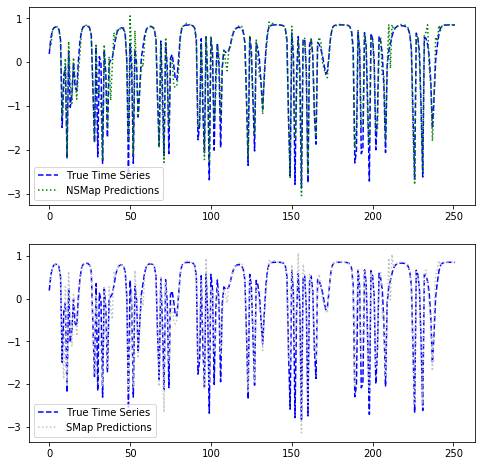

In [91]:
figLOU, axLOU = plt.subplots(2, figsize=(8,8))
axLOU[0].plot(Yn, c="blue", linestyle="dashed", label="True Time Series")
axLOU[0].plot(predictedTSNS, c="green", linestyle="dotted", label="NSMap Predictions")
axLOU[0].legend()

axLOU[1].plot(Ys, c="blue", linestyle="dashed", label="True Time Series")
axLOU[1].plot(predictedTSS, c="silver", linestyle="dotted", label="SMap Predictions")
axLOU[1].legend()
plt.show()

In [92]:
MSENS, sequentialNS = sequential(Xn, Yn, txn, thetaNS, deltaNS, returnSeries=True)
MSES, sequentialS = sequential(Xs, Ys, txs, thetaS, 0, returnSeries=True)

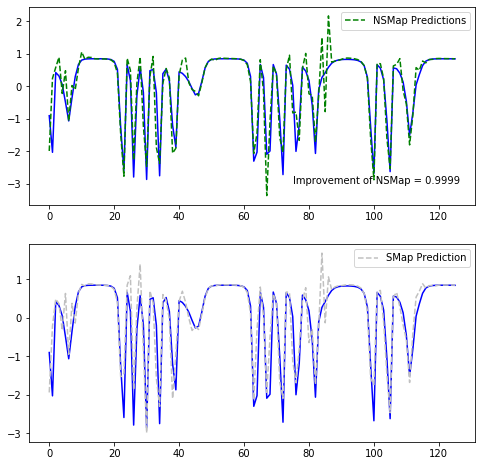

In [93]:
fig, ax = plt.subplots(2, figsize=(8,8))
ax[0].plot(Yn[int(Yn.shape[0]/2):], color="blue")
ax[0].plot(sequentialNS, color="green", linestyle="dashed", label="NSMap Predictions")
ax[0].text(75,-3,f"Improvement of NSMap = {MSES/MSENS:.4f}")
ax[0].legend()

ax[1].plot(Ys[int(Ys.shape[0]/2):], color="blue")
ax[1].plot(sequentialS, color="silver", linestyle="dashed", label="SMap Prediction")
ax[1].legend()

plt.show()

In [94]:
# functionSurfaceNSMap(Xr, predictionHorizon, thetaBestNS, deltaBestNS, 15)

In [95]:
# functionSurfaceSMap(Xr, predictionHorizon, thetaBestS, 15)

In [96]:
### SUMMARY ###

print(f"NSMap -- theta: {thetaNS:.3f}, delta: {deltaNS:.7f}, Min Error: {errNS:.3f}, Optimal Embedding Dimension: {lagsNS+2}, MSE: {MSENS}, 10% Weight Dropoff: {(1-deltaNS)**(0.1)}")
print(f"SMap -- theta: {thetaS:.3f}, Min Error: {errS:.3f}, Optimal Embedding Dimension: {lagsS+2}, MSE: {MSES}")

print(f"Improvement of NSMap: {errS/errNS:.3f}")

print(f"NSMap dof: {dofNS:.3f}")
print(f"SMap dof: {dofS:.3f}")

AkaikeTest(errNS, errS, dofNS, dofS, Xr.shape[0])

NSMap -- theta: 9.538, delta: 1.8947043, Min Error: 17.083, Optimal Embedding Dimension: 5, MSE: 28.483465966315297, 10% Weight Dropoff: nan
SMap -- theta: 9.098, Min Error: 29.388, Optimal Embedding Dimension: 5, MSE: 28.481078826854944
Improvement of NSMap: 1.720
NSMap dof: 184.547
SMap dof: 167.803
Probability SMap beats NSMap:  1.296689291038473e-23


c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# fix, ax = plt.subplots(1)
# ax.imshow(landNS[1:,1:,2])

In [60]:
deltaNS

0.6124931086462889

In [65]:
dynamic_similarity_matrix = schreiberContinuous(Xn, Yn, txn, thetaNS, deltaNS)

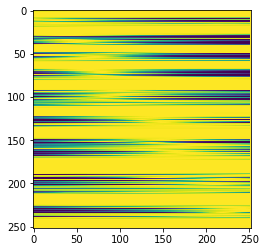

In [67]:
plt.imshow(np.exp(-dynamic_similarity_matrix))

In [ ]:
driverVdelta = np.array([[0, 0.9939017526504343],
          [0.5, 0.913616621633756],
          [1, 0.9404808557939969],
          [1.5, 0.8986395799598124],
          [2.0, 0.7594675023780507],
          [2.5, 0.7385951709456133],
          [3.0, 0.7735371385558871],
          [3.5, 0.9095528584046055]])

In [ ]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.plot(driverVdelta[:,0],driverVdelta[:,1])
ax.set_xlabel("Slope of driver")
ax.set_ylabel("Drop in weight over 10% of series length")
ax.text(1.55,0.98,f"r={np.corrcoef(driverVdelta[:,0],driverVdelta[:,1])[0,1]}")